In [ ]:
!pip install matplotlib
!pip install transformers scikit-learn
!pip install torch torchvision torchaudio





Enter your prompt:  The cat jumped over the
Enter the model's sensitivity factor alpha (default 0.01):  0.001


Step 1:
Prompt: The cat jumped over the
Next token:  railing
Probability of correct next token: 0.9809
--------------------------------------------------
Step 2:
Prompt: The cat jumped over the railing
Next token:  and
Probability of correct next token: 0.9756
--------------------------------------------------
Step 3:
Prompt: The cat jumped over the railing and
Next token:  landed
Probability of correct next token: 0.9723
--------------------------------------------------
Step 4:
Prompt: The cat jumped over the railing and landed
Next token:  on
Probability of correct next token: 0.9676
--------------------------------------------------
Step 5:
Prompt: The cat jumped over the railing and landed on
Next token:  the
Probability of correct next token: 0.9648
--------------------------------------------------


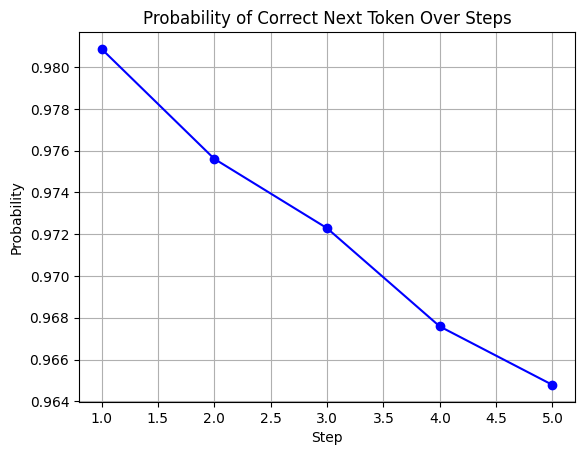

In [1]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch
import matplotlib.pyplot as plt

# Initialize the tokenizer and model
model_name = "gpt2"  # Use GPT-2 for next-word prediction
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# Set pad_token to be eos_token since GPT-2 doesn't have a pad token by default
tokenizer.pad_token = tokenizer.eos_token  # Use EOS token as padding token

def predict_correct_probability(length, complexity, alpha=0.01):
    """
    Calculate the probability of predicting the correct next word.
    """
    return 1 / (1 + alpha * length * complexity)

def calculate_prompt_length(prompt):
    """
    Calculate the number of tokens in a prompt (approximated as words).
    """
    return len(prompt.split())

def estimate_complexity(prompt):
    """
    Estimate the complexity of a prompt using basic linguistic features.
    """
    words = prompt.split()
    num_words = len(words)
    unique_words = len(set(words))
    avg_word_length = sum(len(word) for word in words) / num_words if num_words > 0 else 0

    # Lexical complexity approximation
    lexical_complexity = (avg_word_length * 0.5) + (unique_words / num_words * 2)

    return lexical_complexity

def get_next_token(prompt):
    """
    Generate the next token for a given prompt using GPT-2.
    """
    inputs = tokenizer(prompt, return_tensors="pt")
    with torch.no_grad():
        logits = model(**inputs).logits
    
    predicted_token_id = torch.argmax(logits[0, -1, :]).item()
    predicted_token = tokenizer.decode(predicted_token_id, skip_special_tokens=False)
    
    return predicted_token

def plot_probability_over_steps(prompt, alpha=0.01, max_steps=5):
    """
    Simulate the prediction of the next token and plot the probability of correct next token.
    """
    full_prompt = prompt
    probabilities = []  # To store probabilities over steps

    for step in range(max_steps):
        # Generate the next token
        next_token = get_next_token(full_prompt)

        # Calculate length and complexity for the current prompt
        length = calculate_prompt_length(full_prompt)
        complexity = estimate_complexity(full_prompt)
        
        # Calculate the probability of correctly predicting the next token
        probability = predict_correct_probability(length, complexity, alpha)
        probabilities.append(probability)

        # Display current step details
        print(f"Step {step + 1}:")
        print(f"Prompt: {full_prompt}")
        print(f"Next token: {next_token}")
        print(f"Probability of correct next token: {probability:.4f}")
        print("-" * 50)

        # Append the next token to the prompt
        full_prompt += next_token

    # Plotting the probabilities
    plt.plot(range(1, max_steps + 1), probabilities, marker='o', linestyle='-', color='b')
    plt.title('Probability of Correct Next Token Over Steps')
    plt.xlabel('Step')
    plt.ylabel('Probability')
    plt.grid(True)
    plt.show()

# Main Code
prompt = input("Enter your prompt: ")
alpha = float(input("Enter the model's sensitivity factor alpha (default 0.01): ") or 0.01)
plot_probability_over_steps(prompt, alpha)
